   age  income      gender  time_spent preferred_platform   interests  \
0   51   94413      female         4.5           Facebook      Sports   
1   64   87851      female         1.0           Facebook  Technology   
2   41   68087      female         4.5          Instagram        Food   
3   27   30988        male         5.0          Instagram       Music   
4   55   79214  non-binary         1.0          Instagram      Sports   

  demographics  posts_per_week  exercise_hours  
0     Suburban               7             5.5  
1        Urban              14             8.0  
2        Rural               1            10.0  
3        Urban               3             7.0  
4        Rural              11             4.5  
                age        income  gender   time_spent preferred_platform  \
count   2000.000000   2000.000000    2000  2000.000000               2000   
unique          NaN           NaN       3          NaN                  5   
top             NaN           NaN  f

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a

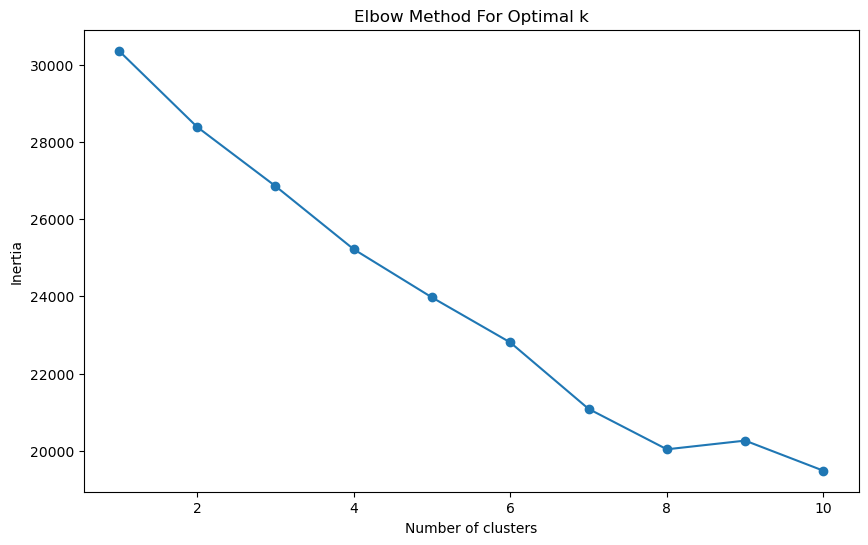

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Silhouette Score: 0.09574282924098583


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'Updated_Social_Media_Usage_Data.csv'
data = pd.read_csv(data_path)

# Display basic data information
print(data.head())
print(data.describe(include='all'))
print(data.isnull().sum())

# Preprocess the data: encoding and scaling
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_data, test_data = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Determine the optimal number of clusters using the Elbow method with inertia
inertias = []
clusters_range = range(1, 11)
for k in clusters_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    kmeans.fit(train_data)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the optimal number of clusters (assuming the elbow point visually)
optimal_k = 4  # This should be set based on the elbow plot

# Building and training the Mini Batch K-Means model
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
kmeans.fit(train_data)

# Evaluating the model
train_labels = kmeans.predict(train_data)
test_labels = kmeans.predict(test_data)
silhouette = silhouette_score(test_data, test_labels)
print(f'Silhouette Score: {silhouette}')

# Prediction function
def predict_social_media_type(new_data):
    new_data_scaled = scaler.transform(new_data)
    return kmeans.predict(new_data_scaled)

# Example usage
# Assuming 'new_data' is a DataFrame with the same structure as the input data (excluding the target feature)
# example_new_data = pd.DataFrame(...)
# social_media_type = predict_social_media_type(example_new_data)
# print(social_media_type)
